<a href="https://colab.research.google.com/github/Sandeep212004/Deep_fake_detection/blob/main/train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets pillow torch torchvision --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from datasets import load_dataset
from PIL import Image

# Load dataset from Hugging Face
dataset = load_dataset("Hemg/deepfake-and-real-images", split="train")

# Define image transformation (resize, convert to tensor, normalize)
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize to 128x128
    transforms.ToTensor(),           # Convert to Tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize (mean=0.5, std=0.5)
])

# Custom PyTorch Dataset class
class DeepfakeDataset(Dataset):
    def __init__(self, dataset, transform=None):
        self.dataset = dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image = self.dataset[idx]["image"]
        label = self.dataset[idx]["label"]

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label, dtype=torch.long)  # Return as Tensor

# Create full dataset
full_dataset = DeepfakeDataset(dataset, transform=transform)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/394 [00:00<?, ?B/s]

train-00000-of-00005.parquet:   0%|          | 0.00/366M [00:00<?, ?B/s]

train-00001-of-00005.parquet:   0%|          | 0.00/356M [00:00<?, ?B/s]

train-00002-of-00005.parquet:   0%|          | 0.00/347M [00:00<?, ?B/s]

train-00003-of-00005.parquet:   0%|          | 0.00/348M [00:00<?, ?B/s]

train-00004-of-00005.parquet:   0%|          | 0.00/377M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/190335 [00:00<?, ? examples/s]

In [ ]:
from torch.utils.data import random_split

# Define split ratio
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size

# Split dataset
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Create DataLoaders for training and validation
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print(f"✅ Dataset Loaded: {train_size} training images, {val_size} validation images")


✅ Dataset Loaded: 152268 training images, 38067 validation images


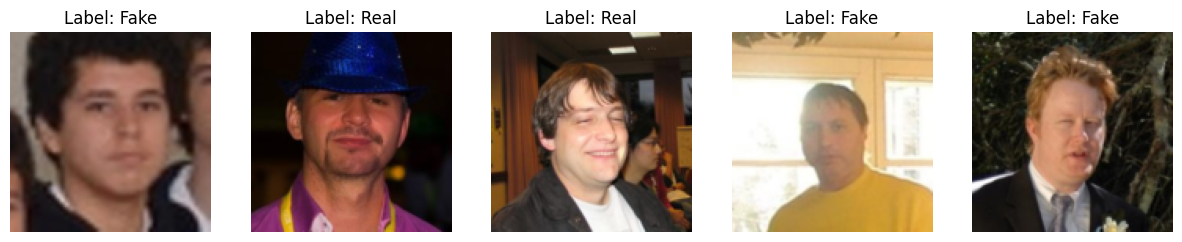

In [ ]:
import matplotlib.pyplot as plt

# Get one batch of images
images, labels = next(iter(train_loader))

# Display some images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    img = images[i].permute(1, 2, 0).numpy()  # Convert to NumPy for visualization
    img = (img * 0.5) + 0.5  # Unnormalize
    axes[i].imshow(img)
    axes[i].set_title(f"Label: {'Fake' if labels[i] == 1 else 'Real'}")
    axes[i].axis("off")
plt.show()


In [ ]:
import torch.nn as nn
import torch.optim as optim

# Define a simple CNN model
class DeepfakeCNN(nn.Module):
    def __init__(self):
        super(DeepfakeCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256 * 16 * 16, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

# Create model instance
model = DeepfakeCNN()

# Define optimizer & loss function
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.BCELoss()  # Binary cross-entropy for deepfake classification

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop
for epoch in range(5):  # Train for 5 epochs
    model.train()
    total_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.float().to(device).unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}: Loss = {total_loss / len(train_loader):.4f}")

print("✅ Model Training Completed!")


Epoch 1: Loss = 0.2794
Epoch 2: Loss = 0.1383
Epoch 3: Loss = 0.0993
Epoch 4: Loss = 0.0717
Epoch 5: Loss = 0.0511
✅ Model Training Completed!


In [ ]:
torch.save(model.state_dict(), "deepfake_cnn.pth")
print("✅ Model saved as deepfake_cnn.pth")


✅ Model saved as deepfake_cnn.pth


🔹 Accuracy: 0.9615
🔹 Precision: 0.9643
🔹 Recall: 0.9578
🔹 F1 Score: 0.9611
🔹 AUC-ROC: 0.9945

Confusion Matrix:
[[18519   669]
 [  796 18083]]


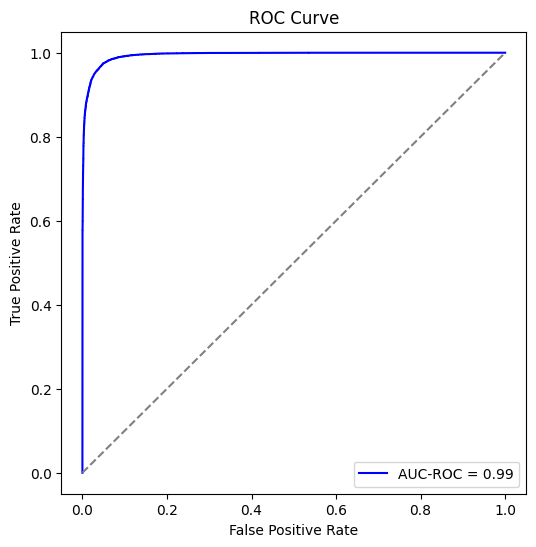

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Ensure model is in evaluation mode
model.eval()

# Initialize lists to store predictions & true labels
all_labels = []
all_preds = []
all_probs = []

# Disable gradient computation for evaluation
with torch.no_grad():
    for images, labels in val_loader:  # Use validation dataset
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)  # Get model predictions
        probs = outputs.cpu().numpy()  # Convert to NumPy
        preds = (outputs > 0.5).cpu().numpy().astype(int)  # Convert to 0 or 1

        all_labels.extend(labels.cpu().numpy())  # Store true labels
        all_preds.extend(preds)  # Store predictions
        all_probs.extend(probs)  # Store probability scores

# Convert lists to NumPy arrays
all_labels = np.array(all_labels)
all_preds = np.array(all_preds)
all_probs = np.array(all_probs)

# Compute Evaluation Metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)
auc_roc = roc_auc_score(all_labels, all_probs)

# Print Evaluation Results
print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall: {recall:.4f}")
print(f"🔹 F1 Score: {f1:.4f}")
print(f"🔹 AUC-ROC: {auc_roc:.4f}")

# Compute Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(all_labels, all_probs)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC-ROC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import torch

# Make sure model is in eval mode
model.eval()

y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        preds = (outputs > 0.5).int()  # Convert sigmoid to binary class

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())


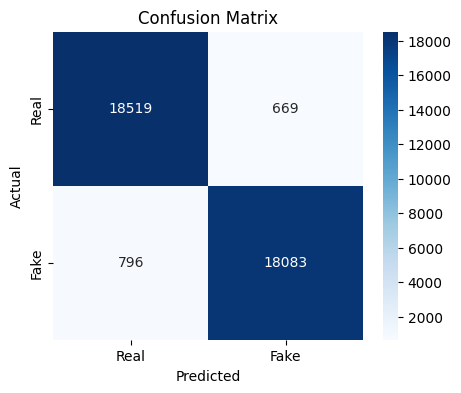

In [ ]:
conf_mat = confusion_matrix(y_true, y_pred)

# Optional: plot it
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import torch
import torch.nn as nn

# Define the CNN architecture (same as the one used for training)
class DeepfakeCNN(nn.Module):
    def __init__(self):
        super(DeepfakeCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256 * 16 * 16, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

# Load model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepfakeCNN().to(device)

# Load trained weights
model.load_state_dict(torch.load("/content/deepfake_cnn.pth", map_location=device))

# Set to evaluation mode
model.eval()


RuntimeError: PytorchStreamReader failed reading zip archive: failed finding central directory